In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn import datasets
import matplotlib.pyplot as plt
x,y = datasets.load_boston(return_X_y=True)




In [21]:
x=pd.DataFrame(x).to_numpy()
y=pd.DataFrame(y).to_numpy()
print(x.shape)
split=(int)(0.8*len(x))

x = (x - x.mean())/(x.max()-x.min())
y = (y - y.mean())/(y.max()-y.min())


xtrain, ytrain =x[:split, :], y[:split, :]
xtrain, ytrain=x[split:, :], y[split:, :]

print(xtrain.shape, ytrain.shape,xtrain.shape, ytrain.shape)

onestrain=np.ones((len(xtrain), 1))
onestest=np.ones((len(xtest), 1))

xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
xtrain[13]=onestrain
xtest[13]=onestest


(506, 13)
(102, 13) (102, 1) (102, 13) (102, 1)


In [19]:
weights = np.zeros([1,14])

In [12]:
xtrain=pd.DataFrame(xtrain).to_numpy()
xtest=pd.DataFrame(xtest).to_numpy()

alpha = 0.05
iters = 3000

In [13]:
def computecost(xtrain, ytrain, weights):
    n=len(ytrain)
    sum = np.power((np.dot(xtrain, weights.T)-ytrain),2)
  
    return np.sum(sum)/(2 * len(xtrain))

In [14]:
def gd(xtrain,ytrain,weights,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        weights = weights - (alpha/len(xtrain)) * np.sum(( np.dot(xtrain, weights.T) - ytrain)*xtrain, axis=0)
        cost[i] = computecost(xtrain, ytrain, weights)
    
    return weights,cost

In [15]:
g,cost = gd(xtrain,ytrain,weights,iters,alpha)
print(g)
#print(cost)

finalCost = computecost(xtrain,ytrain,g)
print(finalCost)
print(weights.T.shape)

[[-0.04472468  0.23015187 -0.06478667 -0.0071148  -0.00972362  0.01224611
  -0.17377049 -0.01095925 -0.00600198 -0.33898975 -0.0409231   0.15093159
  -0.17517657  0.09308609]]
0.017861217787749566
(14, 1)


Text(0.5, 1.0, 'Error vs. Training Epoch')

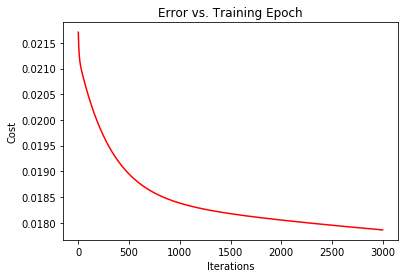

In [16]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 